In [57]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #03 - Statistical Objective Analysis

Purpose:
Script to take sparse upper air observations and analyze them on a
polar stereographic map projection using statistical objective analysis.
Using a Barnes Analysis, we are plotting 500mb heights using an increasing number of observations (2, 4, and 10).
Then comparing the analyses against the background to determine the effectiveness of using more vs. fewer observations.


"""
__author__    = "Andrew G. Kramer"
__contact__   = "andrew.george.kramer@und.edu"

In [58]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles
import pandas as express #Plate w/ double orange chicken and fried rice.

In [59]:
### Read in observations ###
df = express.read_csv(r"C:\Users\andre\Desktop\Class Work\Data Analysis\obs.txt", names = ['Station', 'Lat', 'Lon', 'Height', 'Wind_Dir', 'Wind_Spd']) #Reading in the CSV file into a Pandas dataframe. ALso naming the columns here.
ID = df['Station'] 
lat = df['Lat']*(np.pi/180) #Converting to Radians
lon = df['Lon']*(np.pi/180) #Converting to Radians
height = df['Height'].values
wdir = df['Wind_Dir']
wspd = df ["Wind_Spd"]
print(ID.head(8))

0    CWPL
1    CWQI
2    CWSE
3    CYAH
4    CYBK
5    CYCB
6    CYEU
7    CYEV
Name: Station, dtype: object


In [60]:
### Set up analysis map with a 22x28 rectangular grid of points ###
#From Previous HW
x0 = 18.9 #Setting my constants
y0 = -6.30
del_x = 1.27
x_n = 22 #number of points in the x direction on my grid  (Used Later)
y_n = 28 #number of points in the y direction on my grid (Used Later)
dx = np.arange(18.9,(((del_x*22)+18.9)-1),1.27) #Establishing the x portion of my grid as an array of values
dy = np.arange(-6.30,(((del_x*28)+-6.3)-1),1.27) #Establishing the y portion of my grid as an array of values
xs, ys = np.meshgrid(dx,dy)
###
rho = 6371*1e5 #Setting my constants and converting rho to cm
phi = 90 #degrees
psi_0 = 60 * (np.pi/180)
reflon = -115*(np.pi/180)
map_proj = 1/15e6 #Given the map scale as 1:15,000,000
sigma = (1+np.sin(psi_0))/(1+np.sin(lat)) #Calculating out the appropriate sigma value for each of my values (Dependent on latitude of the obs)
### convert obs lat/long to x,y ###
r = (rho*sigma*np.cos(lat))*map_proj #Calculating out the radius of the earth for each of my points
x = (r*(np.cos(lon-reflon)))
y = (r*(np.sin(lon-reflon))) #Creating coordinate points for my observations
x = np.array(x)
y = np.array(y)
#print(x)
#print(y)
###
gy = (180/np.pi)*((np.pi/2)-(2*np.arctan(np.sqrt(((xs/map_proj)**2)+((ys/map_proj)**2))/(rho*(1+np.sin(psi_0))))))
gx = (np.arctan((ys/xs)))*(180/np.pi) + (-115) #Converting my gridpoints into lat/lon values for the map
###
oby = (180/np.pi)*((np.pi/2)-(2*np.arctan(np.sqrt(((x/map_proj)**2)+((y/map_proj)**2))/(rho*(1+np.sin(psi_0))))))
obx = (np.arctan(y/x)*(180/np.pi)) + (-115) #Converting my obs points into lat/lon values for the map

#This block is meant to fix my apparently broken code from Assignment01
    
    ### convert obs lat/long to x,y (may want to plot on your analysis grid to verify)### 
#Longitude (from grid to longitude)
map_proj = 1/(15e6)
rho = 6371 * 1e5 #radius of Earth
lambda_o = -115
phi_o = 60*(np.pi/180) #Converting to radians
phi_40= 40*(np.pi/180)

newphi  = ((1 +np.sin(phi_o))/(1+np.sin(phi_40)))
#print(newphi)
newmap = 1.24
#Converting the map distance to the actual distance on the earth
map_newval = newmap/newphi
#print(map_newval)

#We are converting it from cm to longitude and latitude so that we can plot it 
##############################################################################
#converting the longitude from x-values to longitude  
proj_lon = np.arctan(ys/xs)*(180/np.pi) + lambda_o    #The projection in python has to be in latitude and longitude so these two steps are to go to lat/lon for the projection
#Converting the y-values to latitude values
proj_lat = (180/np.pi)*((np.pi/2)-(2*np.arctan(np.sqrt((xs/map_proj)**2+(ys/map_proj)**2)/(rho*(1+np.sin(phi_o))))))

C:\Users\andre\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\andre\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\andre\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\andre\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyD

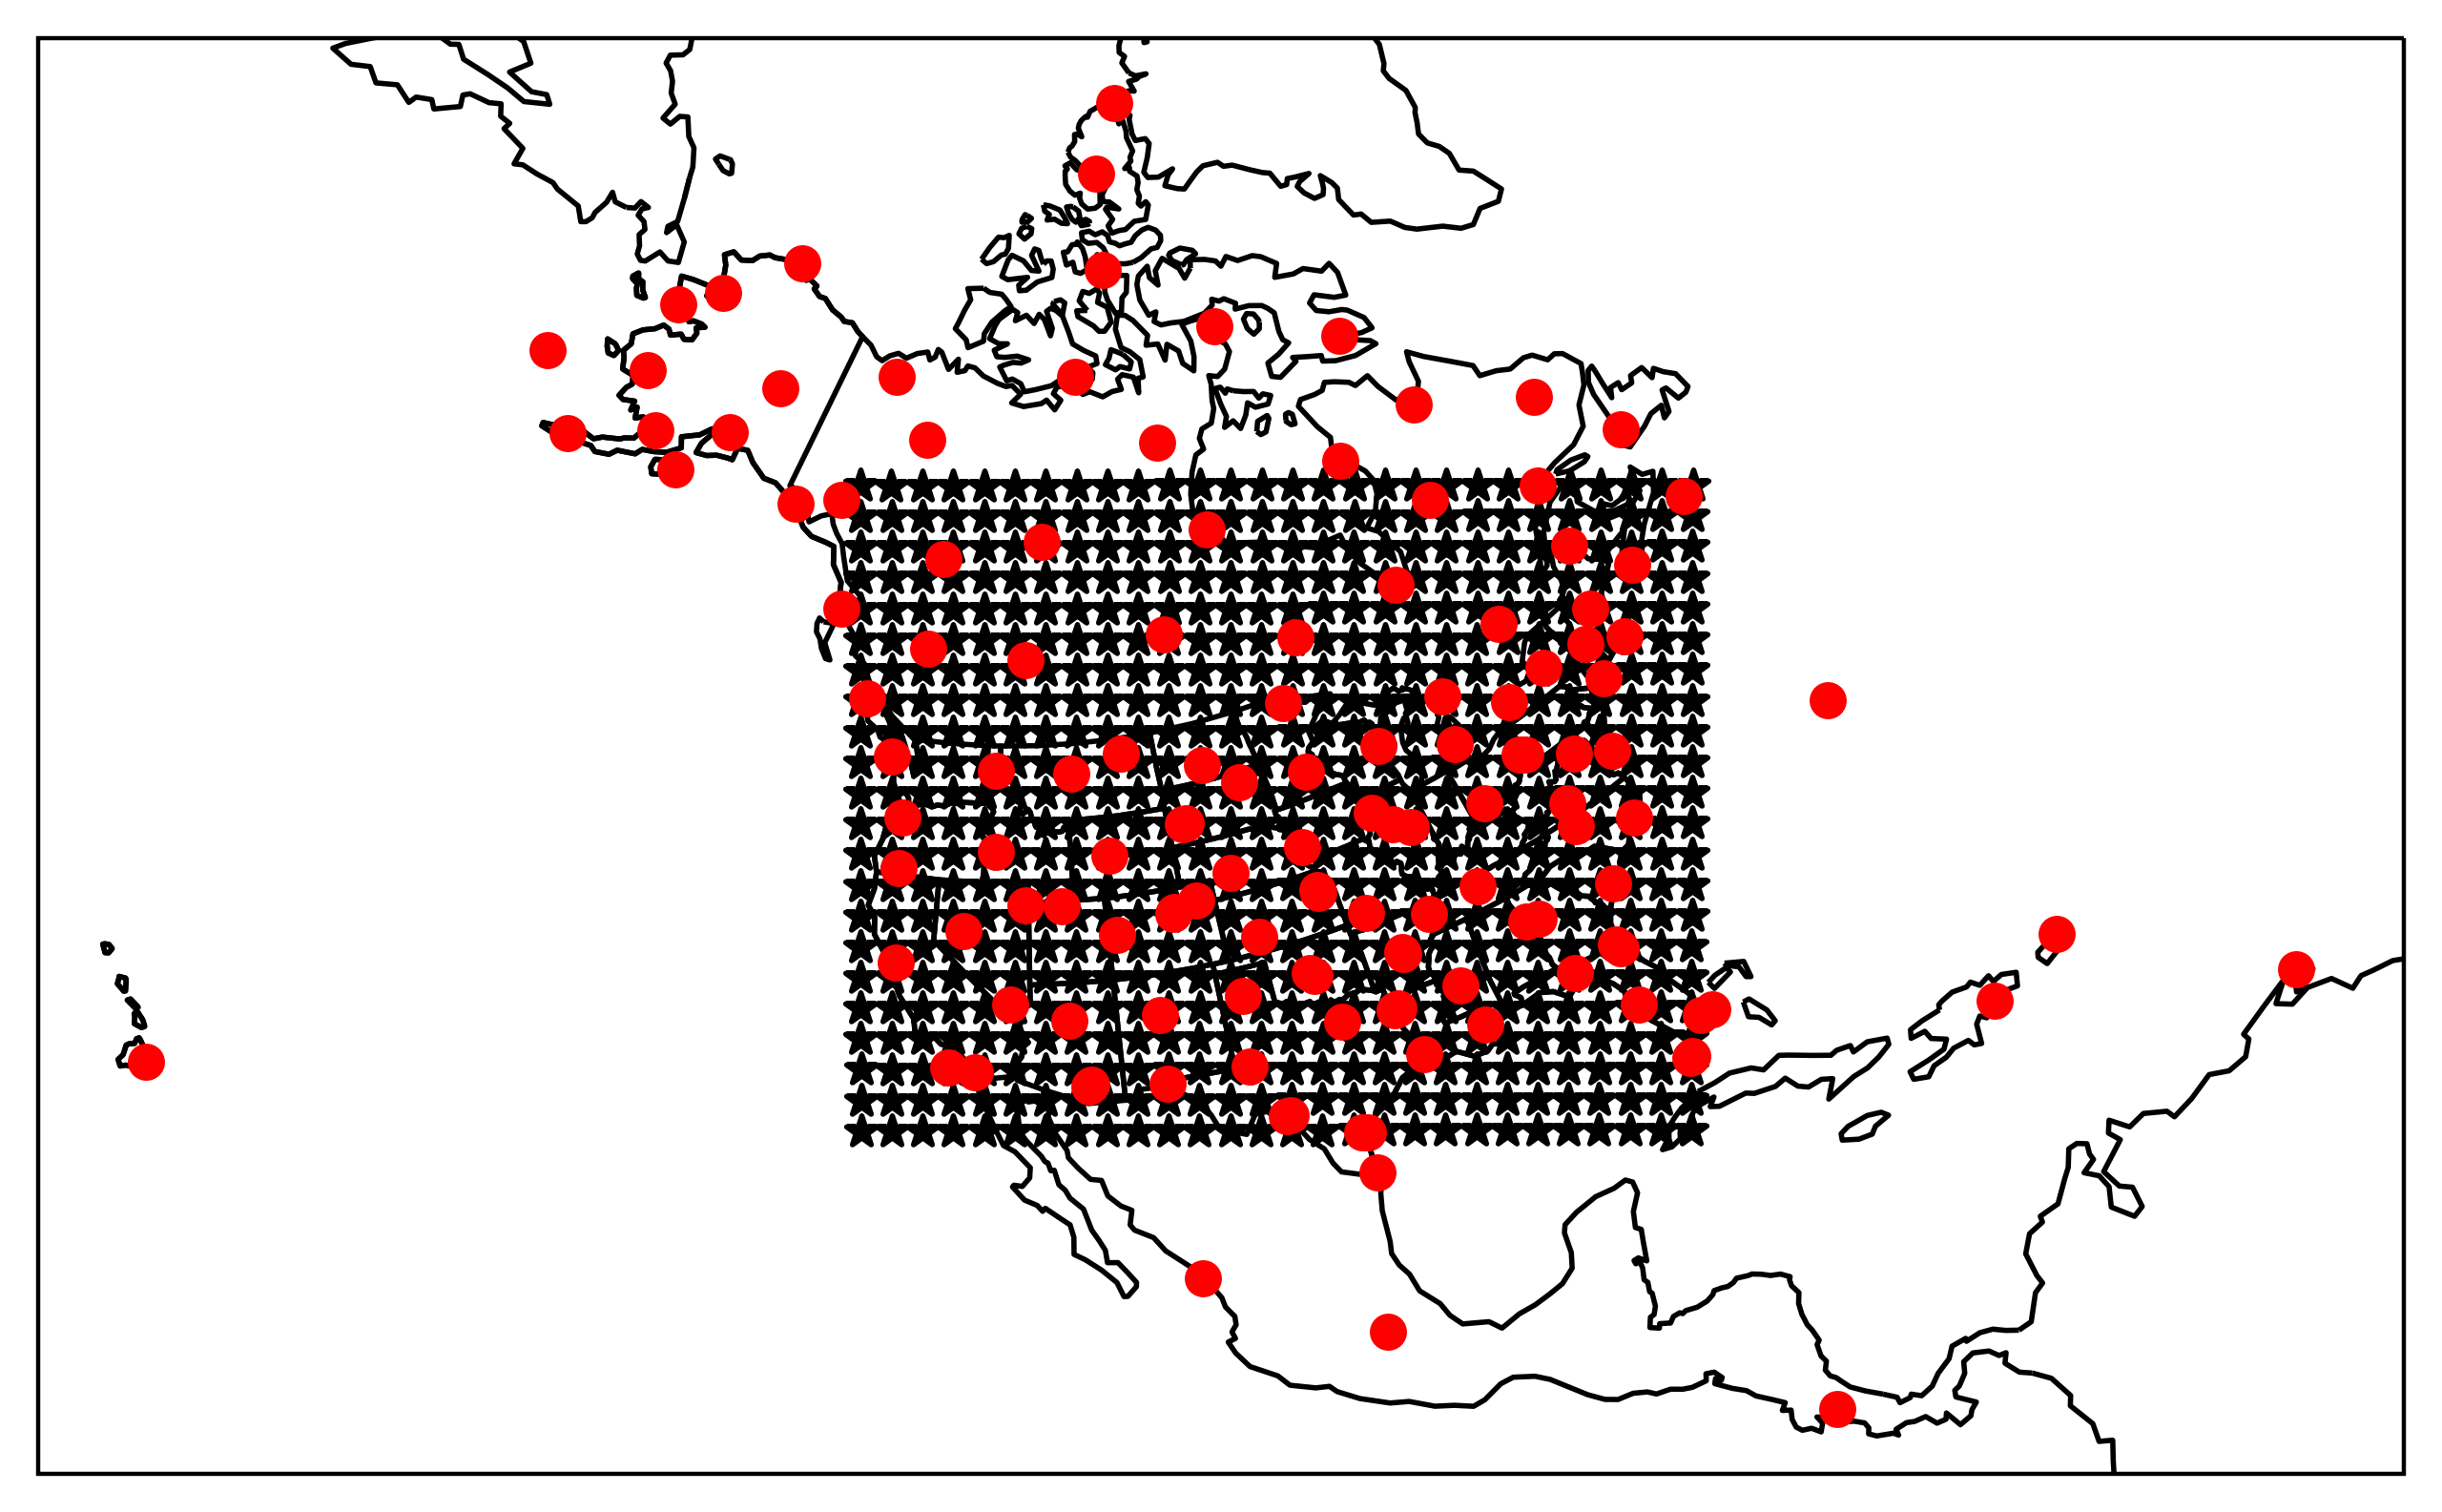

In [61]:
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90, true_scale_latitude = 60) #Creating my background map projection.
fig = plt.figure(figsize=(8,8),dpi=400)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES) #Adding background map features
ax1.add_feature(cfeature.COASTLINE)
ax1.scatter(gx, gy, transform = ccrs.PlateCarree(), marker='*', color='black') #Plotting my gridpoints like a scatterplot
ax1.scatter(obx,oby,transform = ccrs.PlateCarree(), marker='o', color='red') #Plotting my observation points.

In [62]:
### Create function for Barnes Analysis ###
def barnes(dik,R):
        kd=10.8844524
        if dik <= R:
            w=np.exp((-dik**2)/(kd))
        elif dik > R:
            w=0
        else:
            print("I Done Fucked Up Somewhere")
    
        return w

In [63]:
def correlation(dik):
    rho_dik = 0.95 * np.exp(-map_newval*(dik**2))
    #correlation for distances less than 1km to equal 1. Gives you an array of true and falses. Trues get set to 1.
    rho_dik[dik < 1e-3] = 1
    return rho_dik

In [64]:
def bilinterp(x,y,RoI):
    rel_x = x - int(np.floor(x))
    rel_y = y - int(np.floor(y))
    
    z1 = BA[int(np.floor(y)),int(np.floor(x)), RoI]
    z2 = BA[int(np.ceil(y)), int(np.floor(x)), RoI]
    z3 = BA[int(np.ceil(y)), int(np.ceil(x)), RoI]
    z4 = BA[int(np.floor(y)), int(np.ceil(x)), RoI]
    
    p = ((rel_x-1)*(rel_y-1)*z1-(rel_x-0)*(rel_y-1)*z2+(rel_x-0)*(rel_y-0)*z3-(rel_x-1)*(rel_y-0)*z4)

    return p

In [65]:
def bilinterp_mark2(x,y,roi): #Adapted Bilinear Interpolation Function now using our Analysis Matrix not our Background Matrix
    rel_x = x - int(np.floor(x))
    rel_y = y - int(np.floor(y))
    
    z1 = analysis_matrix[int(np.floor(y)),int(np.floor(x)), roi]
    z2 = analysis_matrix[int(np.ceil(y)), int(np.floor(x)), roi]
    z3 = analysis_matrix[int(np.ceil(y)), int(np.ceil(x)), roi]
    z4 = analysis_matrix[int(np.floor(y)), int(np.ceil(x)), roi]
    
    p = ((rel_x-1)*(rel_y-1)*z1-(rel_x-0)*(rel_y-1)*z2+(rel_x-0)*(rel_y-0)*z3-(rel_x-1)*(rel_y-0)*z4)

    return p

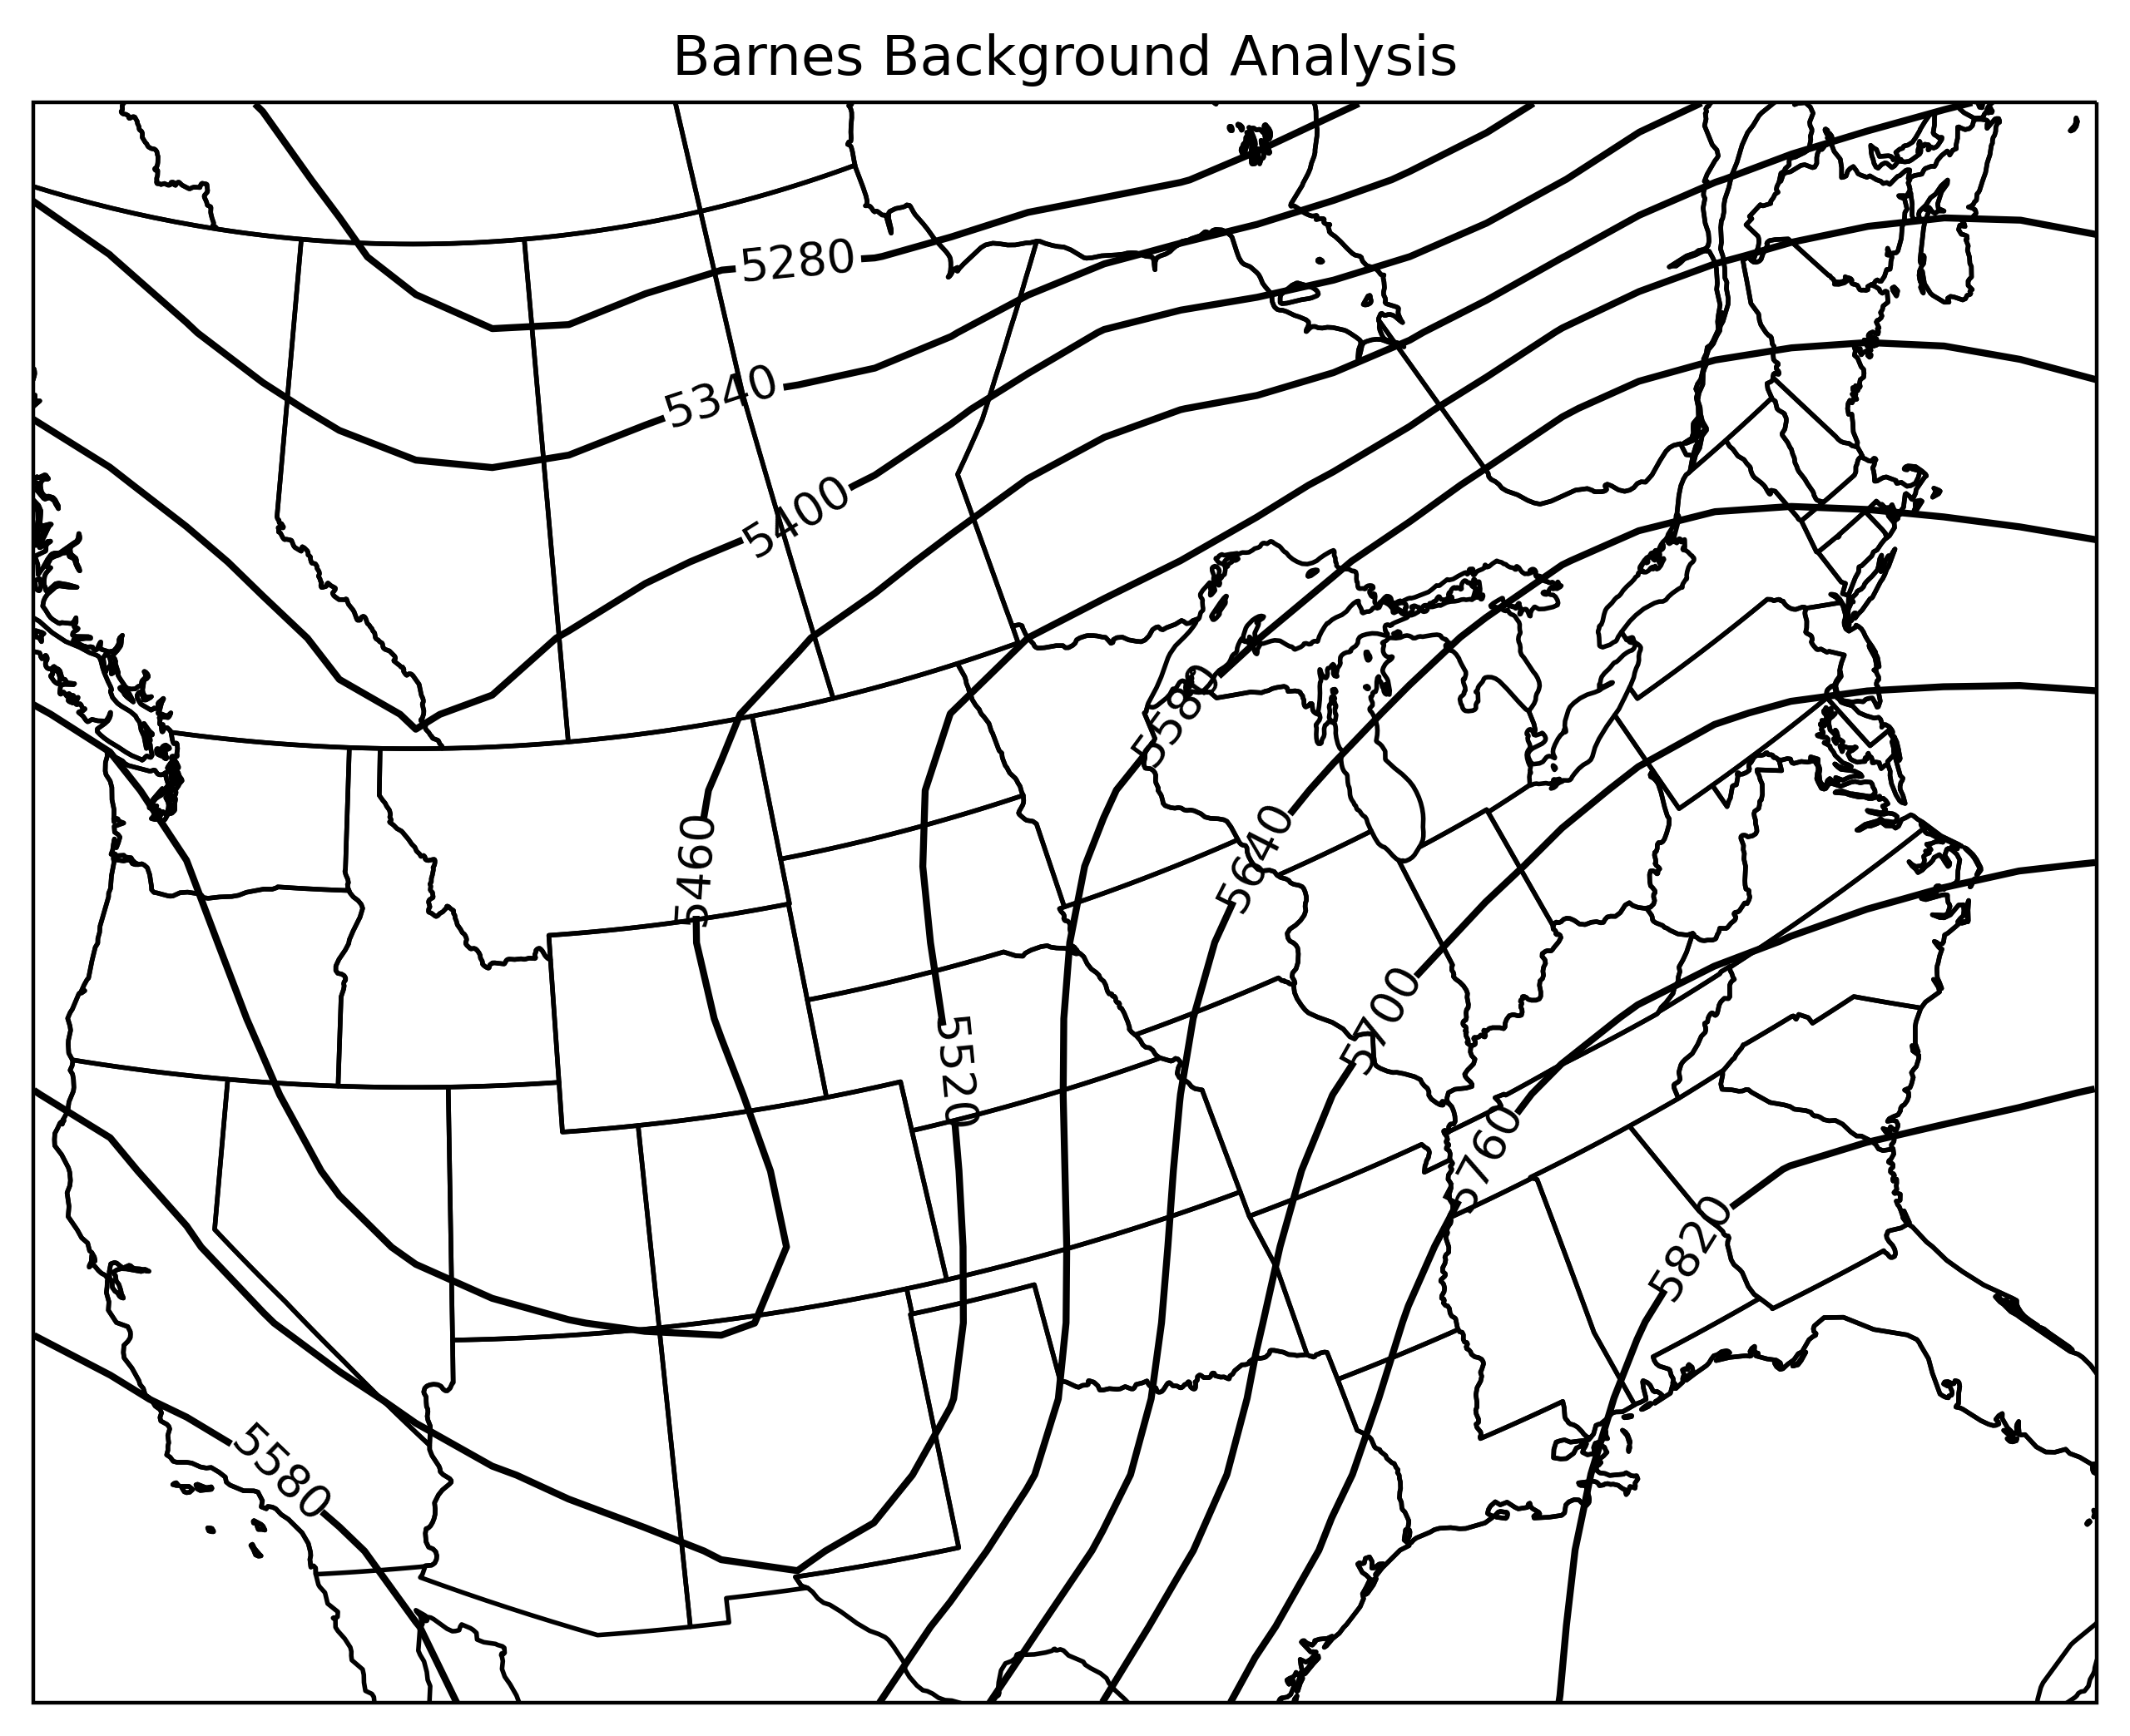

In [66]:
roi1=12.7775892
BA = np.empty((y_n,x_n,3))
fo = np.array(height)

for i in range(len(xs)):
    for j in range(len(xs[0])):
        rel_x2 = np.array(xs[i,j] - x) #The difference of the x values between my analysis point and all observation points
        rel_y2 = np.array(ys[i,j] - y) #Same as above, but with y
        radius = ((rel_x2**2 + rel_y2**2)**0.5) #Distance formula to calculate the distance between the gridpoint and obs
        inds_w_in_roi = np.where(radius<=roi1)[0]
        weights = np.zeros(len(x))
        for k in inds_w_in_roi:
            wik = barnes(radius[k], roi1)
            weights[k] = wik
            
        BA[i,j,0] = np.sum(weights*fo)/(np.sum(weights))
#print(BA)        
    
        
### First analysis, no successive corrections ###

proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90, true_scale_latitude = 60) #Creating the polar-stereographic backround
fig = plt.figure(figsize=(8,8),dpi=400)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES) #Providing state boarders and coastlines to provide visual reference points
ax1.add_feature(cfeature.COASTLINE)
cs1 = ax1.contour(proj_lon, proj_lat, BA[:,:,0], colors = 'k', levels = np.arange(0,8000, 60), transform = ccrs.PlateCarree()) #Creating a contour plot of the values of my analysis array (My c_00 values) at each analysis point.
plt.clabel(cs1, levels = np.arange(0,8000,60)) #Labeling appropriately
plt.title("Barnes Background Analysis")
plt.show() #I wanted to see the map    

In [67]:
#Forward Interpolations for Values at Observation Locations
roi1=12.7775892

ind_x = ((x - x0)/1.27)
ind_y = ((y - y0)/1.27)
J1 = np.zeros((len(x)))

for i in range(len(ind_x)):
    if (ind_x[i] >= 0 and ind_x[i] < 21) and (ind_y[i] >= 0 and ind_y[i] < 27):
        p = bilinterp(ind_x[i], ind_y[i], 0)
    else: #Obs not in grid, do a reverse cressman.
        rel_xa = (x[i] - xs)
        rel_ya = (y[i] - ys)
        radiusa = ((rel_xa**2 + rel_ya**2)**0.5)
        inds_w_in_roi = np.where(radiusa<=roi1)
        weightsa = np.zeros(xs.shape)
        for m in inds_w_in_roi[0]: 
            for n in inds_w_in_roi[1]:
                wik = barnes(radiusa[m,n], roi1)
                weightsa[m,n] = wik
        p = np.sum(weightsa*BA[:,:,0])/(np.sum(weightsa))
    J1[i] = p

C:\Users\andre\AppData\Local\Temp\ipykernel_16524\1225336769.py:21: RuntimeWarning: invalid value encountered in double_scalars
  p = np.sum(weightsa*BA[:,:,0])/(np.sum(weightsa))


In [83]:
N = [2,4,10] #Array of the number of observations to be used ahead. 

analysis_matrix = np.empty((y_n, x_n, len(N)))
print(np.shape(analysis_matrix))
for n in range(len(N)):
    num_points = N[n]
    for i in range(len(xs)):
        for j in range(len(xs[i])):
            r = ((xs[i,j]-x)**2+(ys[i,j]-y)**2)**(1/2)
            new_r = r*(0.15)
            sorted_index = np.argsort(new_r)
            sort_xobs = x[sorted_index[:num_points]]
            sort_yobs = y[sorted_index[:num_points]]
            sort_dist = new_r[sorted_index[:num_points]]
            sort_heights = height[sorted_index[:num_points]]
            sort_bilinear = J1[sorted_index[:num_points]]
            correlation_array = np.empty((num_points,num_points))
            correlation_grid_obs = np.empty((num_points,num_points))
    
            for k in range(len(sort_xobs)):
                dik = ((sort_xobs[k]-sort_xobs)**2+(sort_yobs[k]-sort_yobs)**2)**(1/2)
                #a-posteriori weights
                correlation_array[k] = correlation(dik*0.15)
            #Distance between the analysis points and obs
            correlation_grid_obs = np.matrix(correlation(sort_dist)).T
            #.flatten is converting a (2,1) to a (2)
            weights = np.array(np.linalg.inv(correlation_array)*(correlation_grid_obs)).flatten()
            #Now the actual analysis equation
            analysis_matrix[i,j,n] = BA[i,j,0] + np.nansum(weights*(sort_heights-sort_bilinear))

        

(28, 22, 3)


Text(0.5, 1.0, 'N = 2')

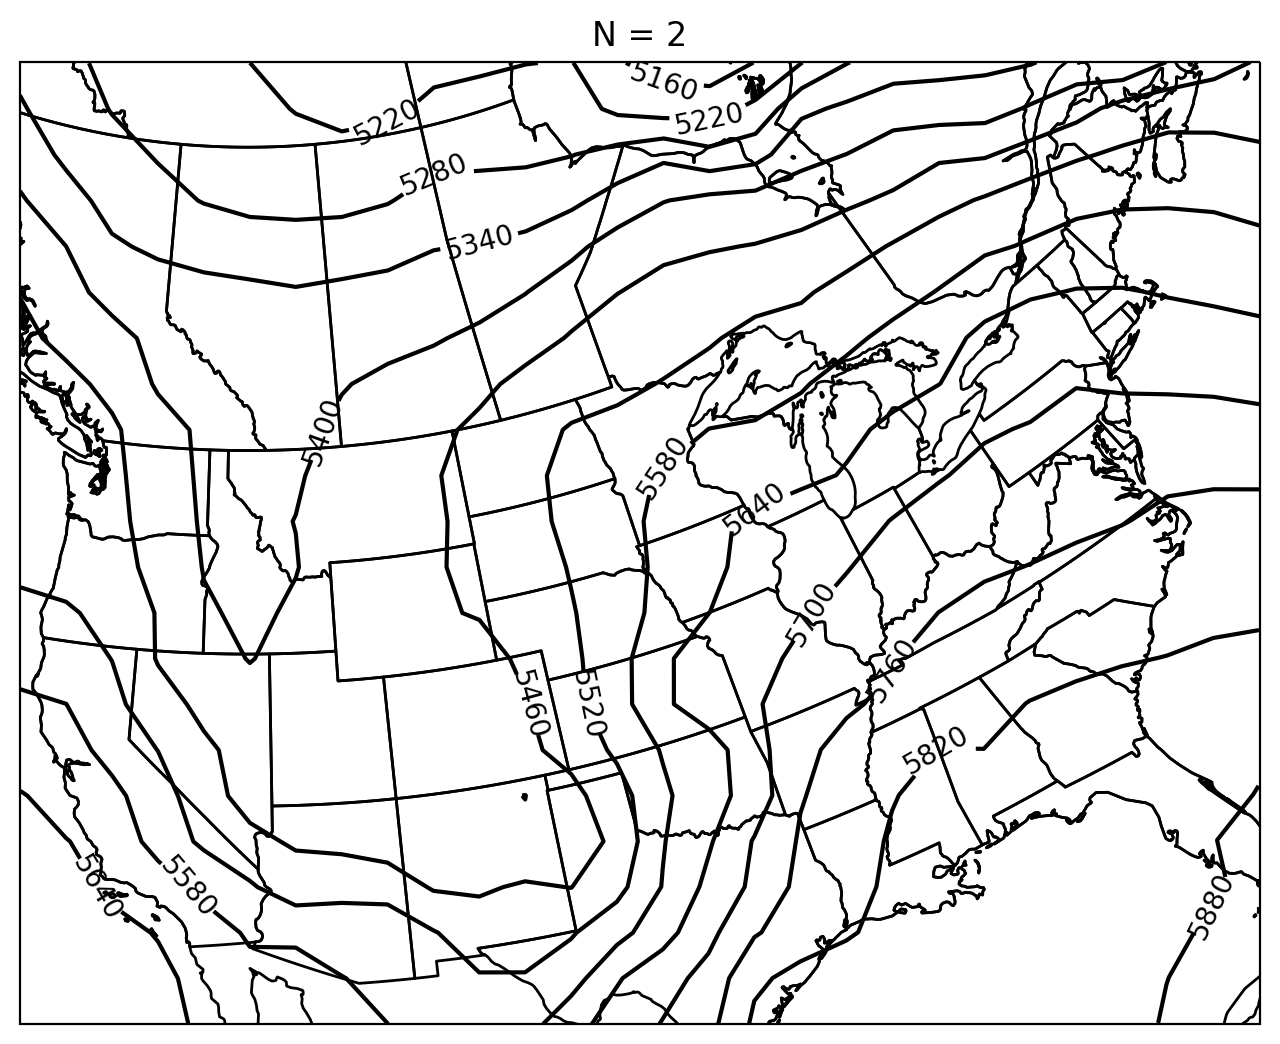

In [69]:
#Plotting N=2
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(proj_lon,proj_lat,analysis_matrix[:,:,0],colors='k',levels = np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(0,8000,60))
plt.title("N = 2")


Text(0.5, 1.0, 'N = 4')

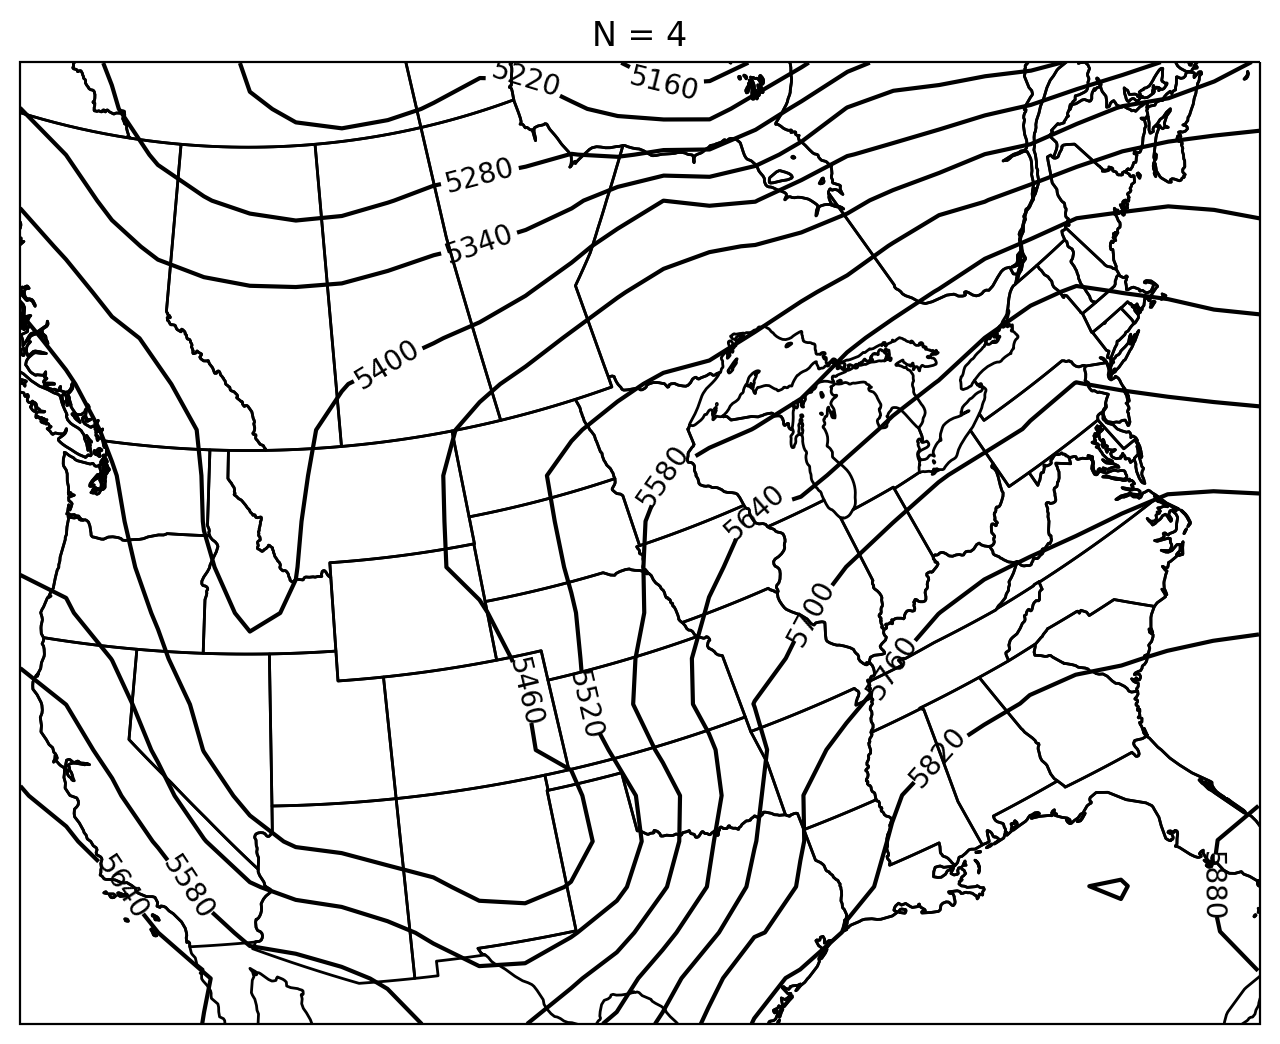

In [70]:
#Plotting N=4
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(proj_lon,proj_lat,analysis_matrix[:,:,1],colors='k',levels = np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(0,8000,60))
plt.title("N = 4")

Text(0.5, 1.0, 'N = 10')

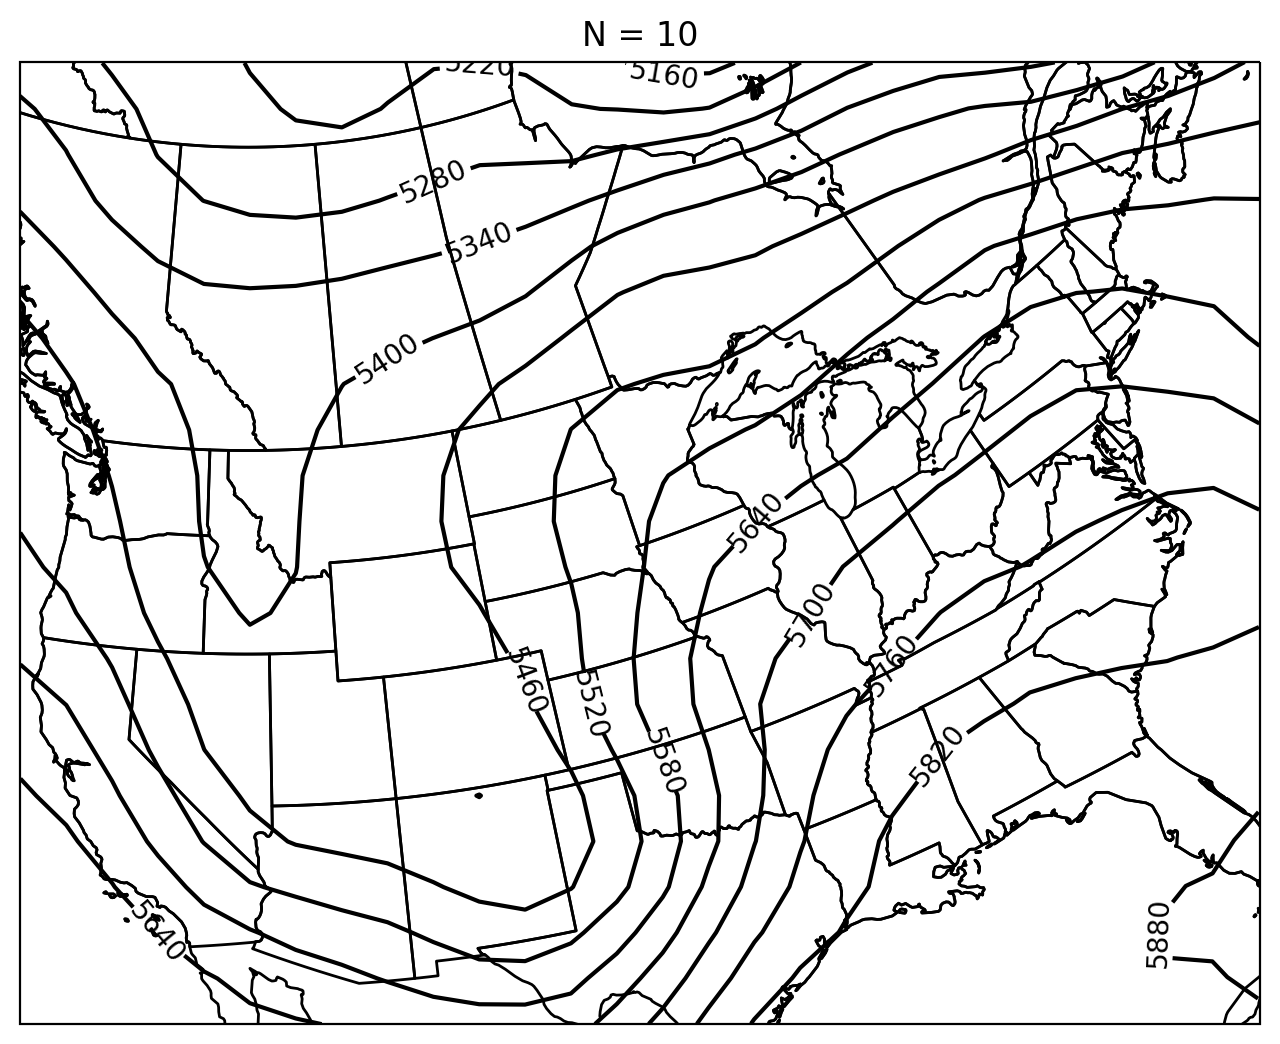

In [71]:
#Plotting N=10
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(proj_lon,proj_lat,analysis_matrix[:,:,2],colors='k',levels = np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(0,8000,60))
plt.title("N = 10")

In [72]:
#Creating the Arrays to be used in the comparison graphs ahead.  
N2_minus_BG = analysis_matrix[:,:,0] - BA[:,:,0]
N4_minus_BG = analysis_matrix[:,:,1] - BA[:,:,0]
N10_minus_BG = analysis_matrix[:,:,2] - BA[:,:,0]

Text(0.5, 1.0, '(N = 2) - Background')

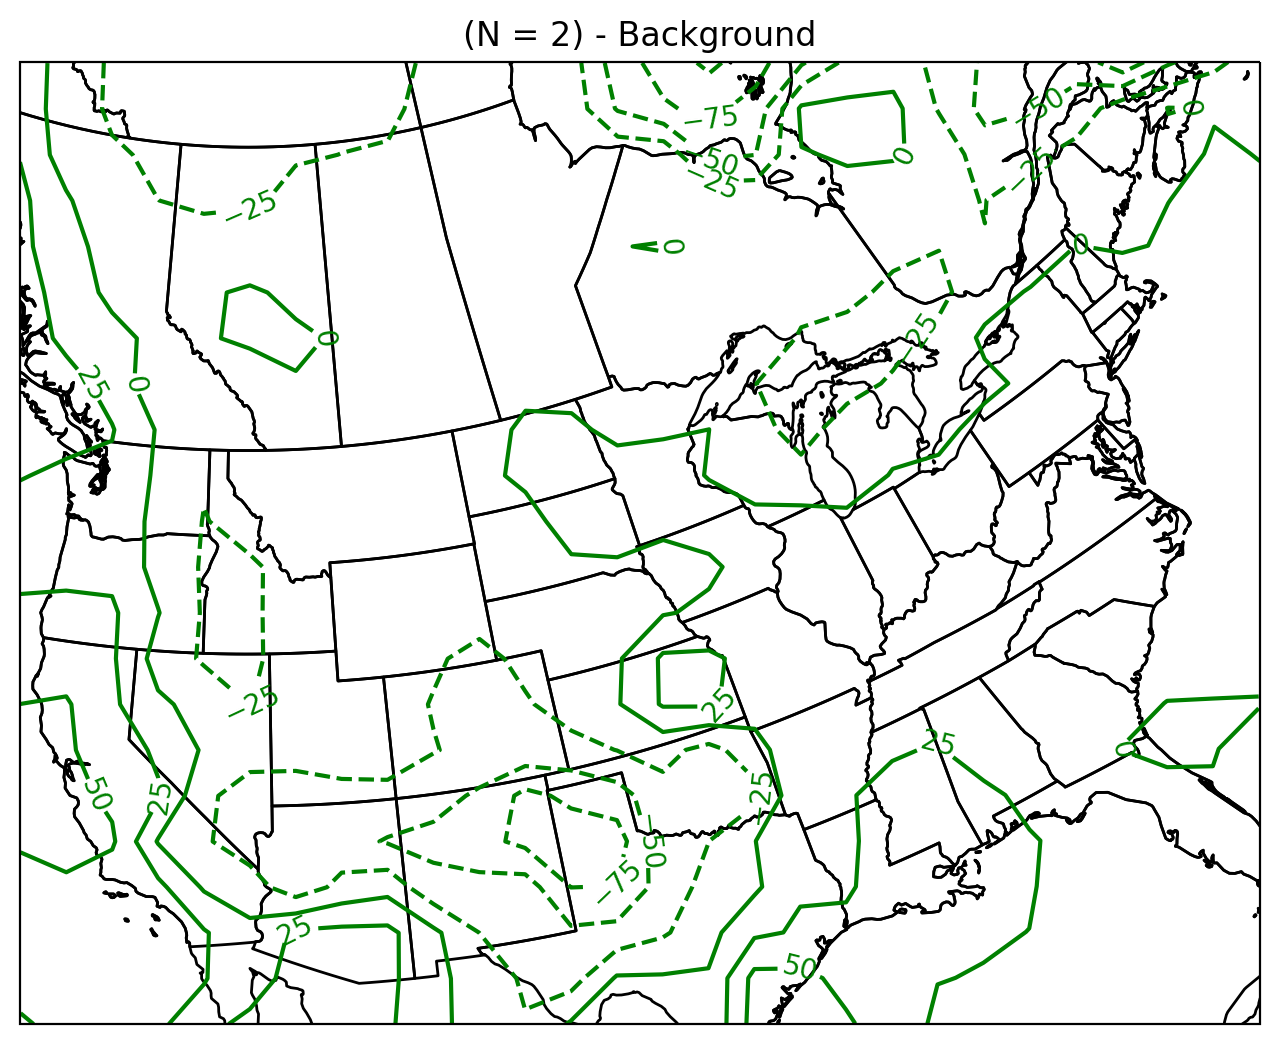

In [73]:
#Plotting the N=2/Background Comparison
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(proj_lon,proj_lat,N2_minus_BG[:,:],colors='g',levels = np.arange(-8000,8000,25),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(-8000,8000,25))
plt.title("(N = 2) - Background")

Text(0.5, 1.0, '(N = 4) - Background')

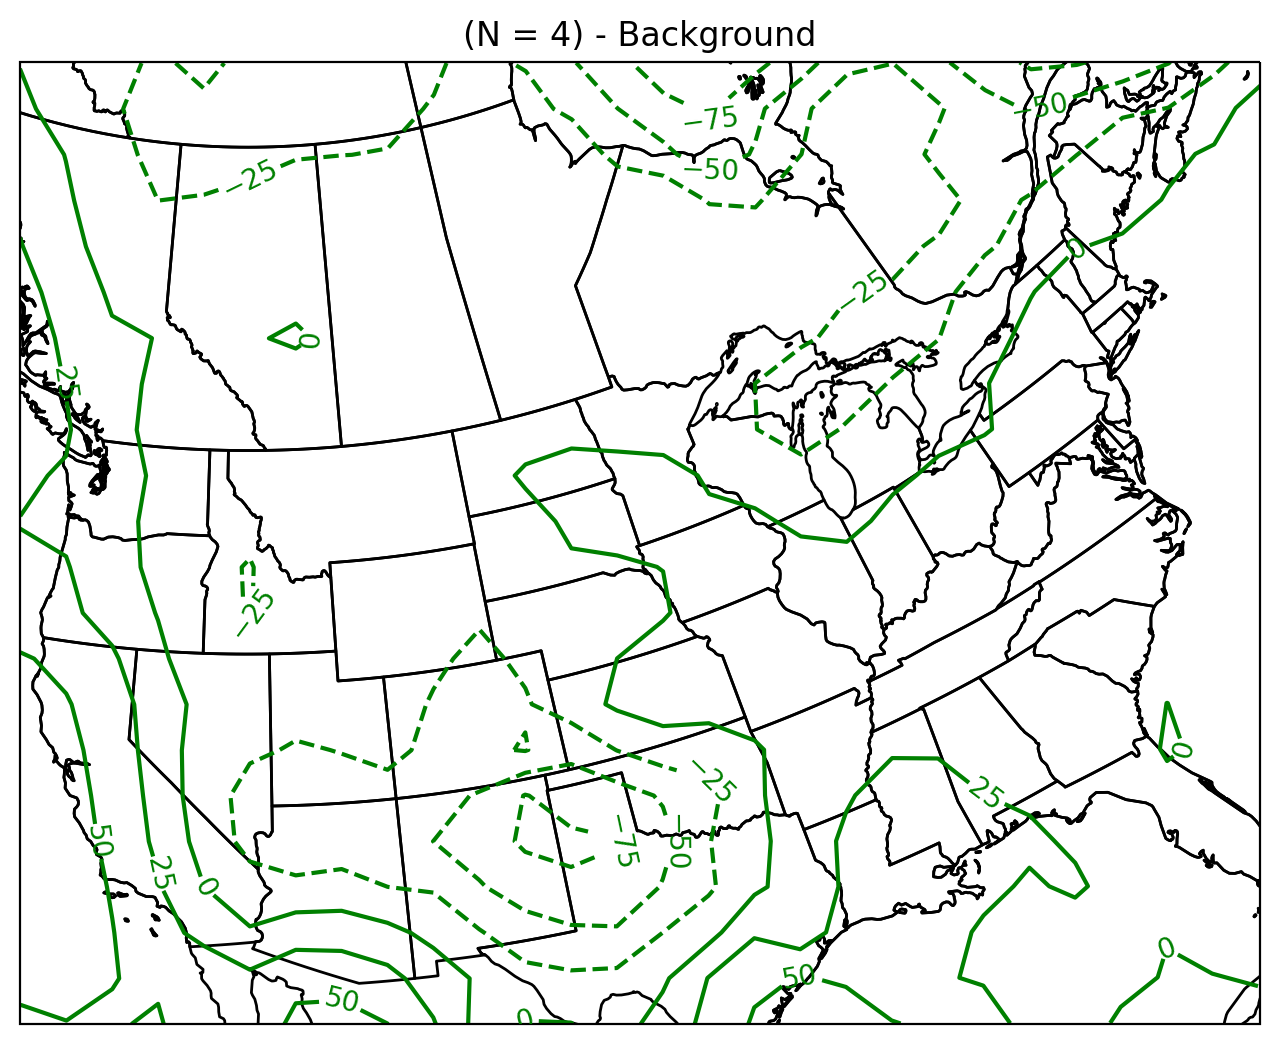

In [74]:
#Plotting the N=4/Background Comparison
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

  
#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(proj_lon,proj_lat,N4_minus_BG[:,:],colors='g',levels = np.arange(-8000,8000,25),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(-8000,8000,25))
plt.title("(N = 4) - Background")

Text(0.5, 1.0, '(N = 10) - Background')

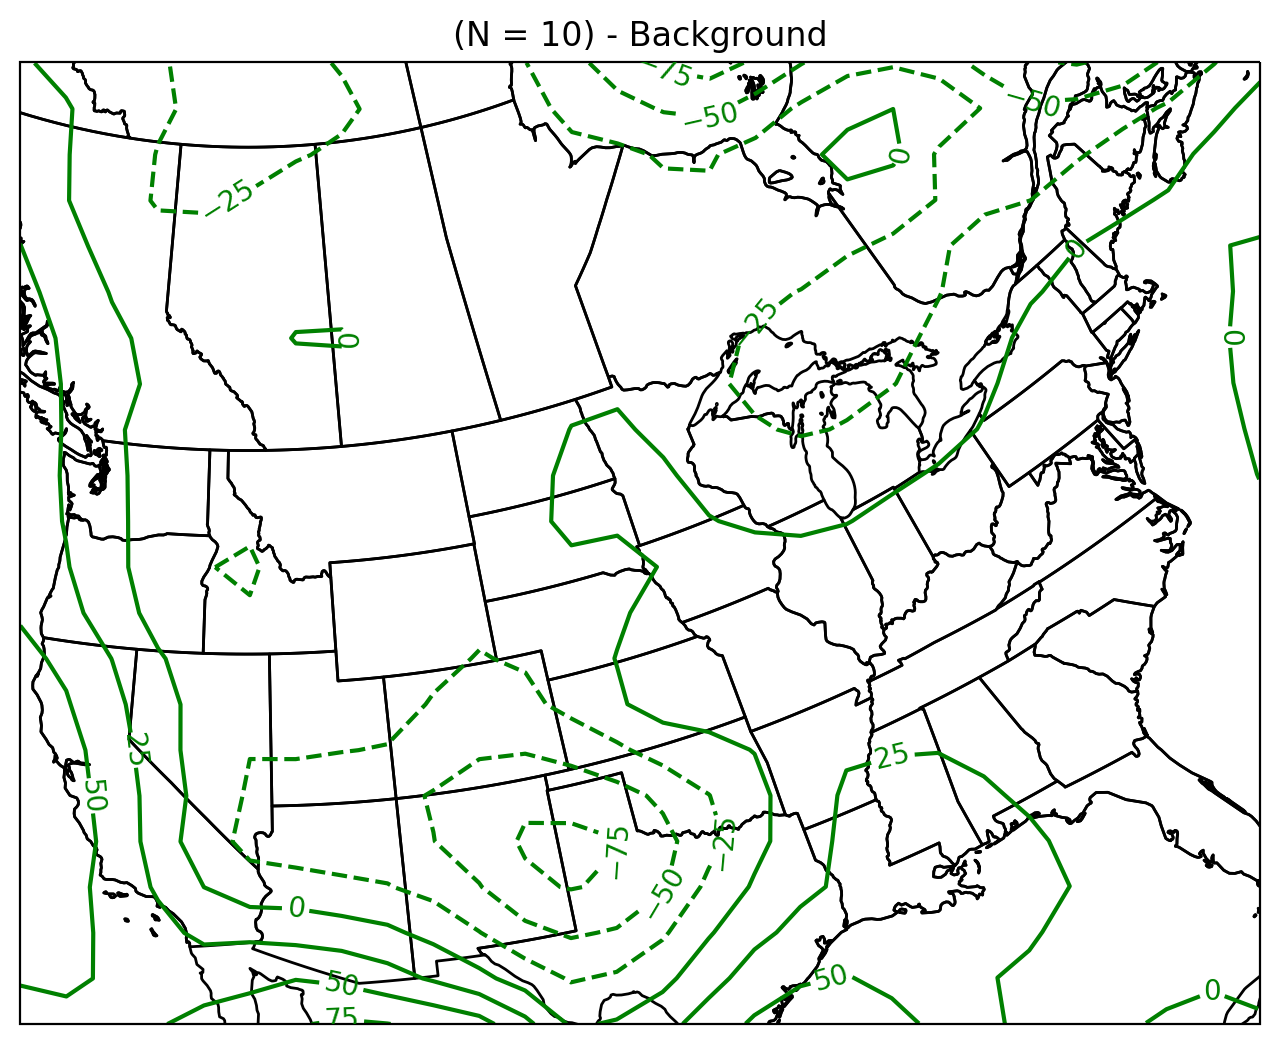

In [75]:
#Plotting the N=10/Background Comparison
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(proj_lon,proj_lat,N10_minus_BG[:,:],colors='g',levels = np.arange(-8000,8000,25),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(-8000,8000,25))
plt.title("(N = 10) - Background")

In [76]:
#Finding the Analysis Difference for N = 2

#Using the following for calculating our analysis at our obervation locations as well as for our analysis points. 
bilinterp0 = np.zeros(len(x))
for i in range(len(ind_x)):
    if (ind_x[i]>= 0) and (ind_x[i] < 21) and (ind_y[i] >= 0) and (ind_y[i] < 27):      #this is the ones that in our grid and we need to use the bilinear here
        p = bilinterp_mark2(ind_x[i], ind_y[i], 0)  #you are using the first index of the analysis matrix 
    else:
        x_dist = x[i] - xs
        y_dist = y[i] - ys
        radius_w_in_roi = ((x_dist)**2 + (y_dist)**2)**(1/2)   #Calculating our Distance
        vals_analysis = np.where(radius_w_in_roi <= roi1)    #Is it in our RoI?
        weights_analysis = np.zeros(xs.shape)
   
        for j in vals_analysis[0]: 
            for k in vals_analysis[1]:
                weights_cressman = barnes(radius_w_in_roi[j,k], roi1)
                weights_analysis[j,k] = weights_cressman
        p = np.sum(weights_analysis*analysis_matrix[:,:,0])/np.sum(weights_analysis)
    bilinterp0[i] = p
print(bilinterp0)

C:\Users\andre\AppData\Local\Temp\ipykernel_16524\150658491.py:19: RuntimeWarning: invalid value encountered in double_scalars
  p = np.sum(weights_analysis*analysis_matrix[:,:,0])/np.sum(weights_analysis)


[5458.66713969 5537.82531542 5356.01455845 5324.57046757 5225.26935388
 5212.50649811           nan 5285.06287524 5195.20854101 5433.58880137
           nan 5450.94214964 5245.59828255 5370.40881759 5207.06746774
 5483.80343656 5230.7985992  5204.40617513 5286.74452086 5275.99754905
 5305.30308816 5248.66034596 5369.62858082 5453.06896062 5420.73316942
 5385.16618231 5442.32380175 5549.84315118 5344.39508935 5711.16296807
 5337.18610683 5443.85685411 5658.69839307 5465.60887995 5332.68022608
 5394.56707136 5615.07339698 5787.88767204 5330.86144536 5510.58802806
 5817.94505053 5779.09376336 5390.95507599 5798.87329912 5311.68152981
 5666.54272686 5761.67733962 5510.9436786  5333.89980603 5629.96845249
 5812.44328793 5771.17113672 5514.87922601 5463.76520335 5680.98838882
 5569.10581297 5466.48150715 5678.92942707 5666.16900843 5671.02864853
 5532.07538743 5882.97937663 5321.03808354 5821.8375447  5479.1308299
 5639.4095642  5673.65788158 5442.69545493 5427.23485254 5612.9852964
 5777.45

In [77]:
bilinterp1 = np.zeros(len(x))
for i in range(len(ind_x)):
    if (ind_x[i]>= 0) and (ind_x[i] < 21) and (ind_y[i] >= 0) and (ind_y[i] < 27):     
        p = bilinterp_mark2(ind_x[i], ind_y[i], 1)  
    else:
        x_dist = x[i] - xs
        y_dist = y[i] - ys
        radius_w_in_roi = ((x_dist)**2 + (y_dist)**2)**(1/2)   #Calculating Distance
        vals_analysis = np.where(radius_w_in_roi <= roi1)    #is it in our ROI?
        weights_analysis = np.zeros(xs.shape)
   
        for j in vals_analysis[0]:
            for k in vals_analysis[1]:
                weights_cressman = barnes(radius_w_in_roi[j,k], roi1)
                weights_analysis[j,k] = weights_cressman
        p = np.sum(weights_analysis*analysis_matrix[:,:,1])/np.sum(weights_analysis)
    bilinterp1[i] = p
print(bilinterp1)

C:\Users\andre\AppData\Local\Temp\ipykernel_16524\4025101454.py:16: RuntimeWarning: invalid value encountered in double_scalars
  p = np.sum(weights_analysis*analysis_matrix[:,:,1])/np.sum(weights_analysis)


[5458.54757323 5538.23208988 5354.22233928 5313.22925857 5219.94563921
 5210.00463375           nan 5285.53526433 5192.18795246 5431.90255843
           nan 5449.75600813 5240.65994715 5369.74537739 5203.42587691
 5482.44140797 5231.27818878 5195.18639477 5278.56324031 5277.35464561
 5309.88421855 5241.22286788 5363.89359039 5452.5478222  5416.23020552
 5384.71172009 5451.57598949 5546.7999141  5336.97516178 5711.44219086
 5329.1673061  5446.19120418 5659.00280666 5471.14975626 5325.83894541
 5392.49628572 5614.10950507 5791.20481654 5322.14253245 5509.58648486
 5824.38850169 5779.07610577 5393.52092546 5802.14736777 5306.22390196
 5669.86191504 5763.64490963 5501.40848174 5325.2424951  5629.06933746
 5813.46525764 5772.72578844 5512.07618428 5462.08037945 5677.1025547
 5560.93939489 5464.20995011 5674.3169767  5663.45119621 5664.45900358
 5538.24853328 5881.81136004 5315.27997718 5823.54051602 5489.62509238
 5622.54918947 5668.09060414 5442.52540169 5424.53314872 5614.22056208
 5776.6

In [78]:
bilinterp2 = np.zeros(len(x))
for i in range(len(ind_x)):
    if (ind_x[i]>= 0) and (ind_x[i] < 21) and (ind_y[i] >= 0) and (ind_y[i] < 27):
        p = bilinterp_mark2(ind_x[i], ind_y[i], 2)  
    else:
        x_dist = x[i] - xs
        y_dist = y[i] - ys
        radius_w_in_roi = ((x_dist)**2 + (y_dist)**2)**(1/2)   #Calculating Distance
        vals_analysis = np.where(radius_w_in_roi <= roi1)    #is it in our ROI?
        weights_analysis = np.zeros(xs.shape)
   
        for j in vals_analysis[0]: 
            for k in vals_analysis[1]:
                weights_cressman = barnes(radius_w_in_roi[j,k], roi1)
                weights_analysis[j,k] = weights_cressman
        p = np.sum(weights_analysis*analysis_matrix[:,:,0])/np.sum(weights_analysis)
    bilinterp2[i] = p
print(bilinterp2)

C:\Users\andre\AppData\Local\Temp\ipykernel_16524\2456974867.py:16: RuntimeWarning: invalid value encountered in double_scalars
  p = np.sum(weights_analysis*analysis_matrix[:,:,0])/np.sum(weights_analysis)


[5447.90666733 5538.78719679 5353.61881866 5312.41989544 5225.26935388
 5212.50649811           nan 5285.06287524 5195.20854101 5433.58880137
           nan 5449.29596222 5245.59828255 5369.18214744 5207.06746774
 5484.44381565 5230.49544695 5204.40617513 5286.74452086 5275.99754905
 5310.33610232 5240.82863111 5369.62858082 5452.36096416 5420.73316942
 5385.51170696 5448.48684967 5545.67508257 5344.39508935 5712.32182934
 5337.18610683 5443.8626961  5655.34645452 5471.16790873 5332.68022608
 5394.56707136 5613.07404121 5794.42190115 5330.86144536 5505.20355854
 5825.77898699 5777.86893726 5393.30212488 5798.87329912 5311.68152981
 5667.97128449 5765.77135494 5499.80329869 5333.89980603 5630.79707994
 5811.01715664 5771.17113672 5509.2571675  5461.03843374 5686.61943358
 5561.32145477 5463.02052683 5682.11077973 5662.95457199 5664.02435586
 5547.52002743 5883.74803472 5321.03808354 5824.89273087 5490.81785451
 5622.0411631  5672.29008778 5443.25758305 5422.41209816 5618.47803479
 5777.

In [79]:
#Calculating our Root Mean Squared differences.
diff1 = (height - bilinterp0)**2
diff_1 = diff1[~np.isnan(diff1)]
rms1 = np.sqrt(np.sum(diff1/len(diff1)))


diff2 = (height - bilinterp1)**2
diff2 = diff2[~np.isnan(diff2)]
rms2 = np.sqrt(np.sum(diff2/len(diff2)))


diff3 = (height - bilinterp2)**2
diff3 = diff3[~np.isnan(diff3)]
rms3 = np.sqrt(np.sum(diff3/len(diff3)))

rms = list([rms1,rms2, rms3])

In [80]:
### Store the analyses in text files ###
np.savetxt('N2_Analysis.txt', analysis_matrix[:,:,0], delimiter=',') 
np.savetxt('N4_Analysis.txt', analysis_matrix[:,:,1], delimiter=',')
np.savetxt('N10_Analysis.txt', analysis_matrix[:,:,2], delimiter=',')
### Store the difference fields in text files ###
np.savetxt('N2-BG.txt', bilinterp0, delimiter=',') 
np.savetxt('N4-BG.txt', bilinterp1, delimiter=',')
np.savetxt('N10-BG.txt', bilinterp2, delimiter=',')
### Store RMS values in text file ###
np.savetxt('RMS_Values', rms, delimiter=',') 

In [82]:
"""
1. Describe the general features that you see in your contoured analyses.
    
    As with the other assignments which use the same observations, there is a 500mb trough which exists over the Rocky Mountains and a trough which 
    lies somewhere on a line between Michigan and Alabama.

2. Describe the differences that you see in your contoured analyses. Does one analysis seem to be smoother than the other? If so, what would cause this
    
    With an increasing number of observations the contours of our analyses smooth. So that being the case, N=10 is the smoothest of the requested
    plots. With fewer observations used (such as in the plot N=2) the larger scale features are displayed but it lacks an ability to resolve the finer scale features.
    More observations lead to a better understanding and visualization of the smaller scale features which leads to the smoothing.
    
3. What happens as you increase the number of points considered for the analysis? Is this desirable? Why or why not?
    
    There is a law of diminishing returns, more points considered in an analysis does not always return a desirable outcome.
    When looking at the plots which compare our analyses to the background, the jump from N=2 to N=4 produces a larger change in the overall contours,
    While the jump from N=4 to N=10 creates minimal changes. So the increasing of the number of points considered for the analysis is desirable to an extent.
"""

'\n1. Describe the general features that you see in your contoured analyses.\n    \n    As with the other assignments which use the same observations, there is a 500mb trough which exists over the Rocky Mountains and a trough which \n    lies somewhere on a line between Michigan and Alabama.\n\n2. Describe the differences that you see in your contoured analyses. Does one analysis seem to be smoother than the other? If so, what would cause this\n    \n    With an increasing number of observations the contours of our analyses smooth. So that being the case, N=10 is the smoothest of the requested\n    plots. With fewer observations used (such as in the plot N=2) the larger scale features are displayed but it lacks an ability to resolve the finer scale features.\n    More observations lead to a better understanding and visualization of the smaller scale features which leads to the smoothing.\n    \n3. What happens as you increase the number of points considered for the analysis? Is this de